In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/telco.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [ ]:
df = df.drop(['Customer ID','Under 30', 'Number of Dependents','Country', 'City','Zip Code','Latitude','Longitude', 'Population', 'Quarter','Referred a Friend','Number of Referrals','Total Refunds', 'Total Extra Data Charges','Offer','Avg Monthly Long Distance Charges','Total Long Distance Charges','Total Extra Data Charges','Total Refunds','Streaming Music','Unlimited Data','Payment Method','Customer Status','Churn Score','CLTV','Churn Category','Churn Reason'], axis=1)

In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Senior Citizen,0
Married,0
Dependents,0
State,0
Tenure in Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0


In [ ]:
df['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable', nan], dtype=object)

In [ ]:
df.replace('?', np.nan, inplace=True)
df.replace('-999', np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   5517 non-null   object 
 1   Age                      5517 non-null   int64  
 2   Senior Citizen           5517 non-null   object 
 3   Married                  5517 non-null   object 
 4   Dependents               5517 non-null   object 
 5   State                    5517 non-null   object 
 6   Tenure in Months         5517 non-null   int64  
 7   Phone Service            5517 non-null   object 
 8   Multiple Lines           5517 non-null   object 
 9   Internet Service         5517 non-null   object 
 10  Internet Type            5517 non-null   object 
 11  Avg Monthly GB Download  5517 non-null   int64  
 12  Online Security          5517 non-null   object 
 13  Online Backup            5517 non-null   object 
 14  Device Protection Plan   5517

we have 3 ways to handel data 1. Dropping all the empty cells(may result in bias) 2. Fillin NaN values with mean, mode, median( result in algorathematic bias) 3. Predecting missing values with other values.

7043 data in the beginning, we remove the empty data because we can have enough data to predict the churn value.(Human bias)

In [ ]:
df

,Gender,Age,Senior Citizen,Married,Dependents,State,Tenure in Months,Phone Service,Multiple Lines,Internet Service,...,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,Churn Label
0,Male,78,Yes,No,No,California,1,No,No,Yes,...,No,No,Yes,Month-to-Month,Yes,39.65,39.65,59.65,3,Yes
1,Female,74,Yes,Yes,Yes,California,8,Yes,Yes,Yes,...,No,No,No,Month-to-Month,Yes,80.65,633.30,1024.10,3,Yes
2,Male,71,Yes,No,Yes,California,18,Yes,Yes,Yes,...,No,Yes,Yes,Month-to-Month,Yes,95.45,1752.55,1910.88,2,Yes
3,Female,78,Yes,Yes,Yes,California,25,Yes,No,Yes,...,No,Yes,Yes,Month-to-Month,Yes,98.50,2514.50,2995.07,2,Yes
4,Female,80,Yes,Yes,Yes,California,37,Yes,Yes,Yes,...,No,No,No,Month-to-Month,Yes,76.50,2868.15,3102.36,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,62,No,No,No,California,12,No,No,Yes,...,Yes,Yes,Yes,One Year,No,60.65,743.30,702.89,3,No
7039,Male,38,No,Yes,Yes,California,24,Yes,Yes,Yes,...,Yes,Yes,Yes,One Year,Yes,84.80,1990.50,2807.47,3,No
7040,Female,30,No,Yes,Yes,California,72,Yes,Yes,Yes,...,No,Yes,Yes,One Year,Yes,103.20,7362.90,9453.04,4,No
7041,Female,32,No,Yes,Yes,California,11,No,No,Yes,...,No,No,No,Month-to-Month,Yes,29.60,346.45,319.21,4,No


In [ ]:
for i in df.columns:
  if df[i].isna().any():
    print(f"The null value in {i} are listed below: ")
    print(df[df[i].isna()])

In [ ]:
cont = []
cat = []
for i in df.columns:
  if df[i].dtype == 'int64' or df[i].dtype == 'float64':
    cont.append(i)
  else:
    cat.append(i)

print("Continuous Variables:", cont)
print("Categorical Variables:", cat)

Continuous Variables: ['Age', 'Tenure in Months', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Revenue', 'Satisfaction Score']
Categorical Variables: ['Gender', 'Senior Citizen', 'Married', 'Dependents', 'State', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Churn Label']


In [ ]:
df.describe()

,Age,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score
count,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000
mean,47.543411,32.884720,26.189958,76.844254,2727.620228,3477.585320,3.077760
std,17.259656,24.583369,19.586585,21.924661,2355.447288,3020.720067,1.206975
min,19.000000,1.000000,2.000000,23.450000,23.450000,23.450000,1.000000
25%,33.000000,9.000000,13.000000,59.950000,586.050000,767.350000,3.000000
50%,47.000000,30.000000,21.000000,79.450000,2135.500000,2653.340000,3.000000
75%,61.000000,56.000000,30.000000,94.450000,4527.450000,5841.310000,4.000000
max,80.000000,72.000000,85.000000,118.750000,8684.800000,11979.340000,5.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat:
  df[i] = label_encoder.fit_transform(df[i])

Visualization

In [ ]:
columns = ['Age', 'Tenure in Months', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Revenue', 'Satisfaction Score']

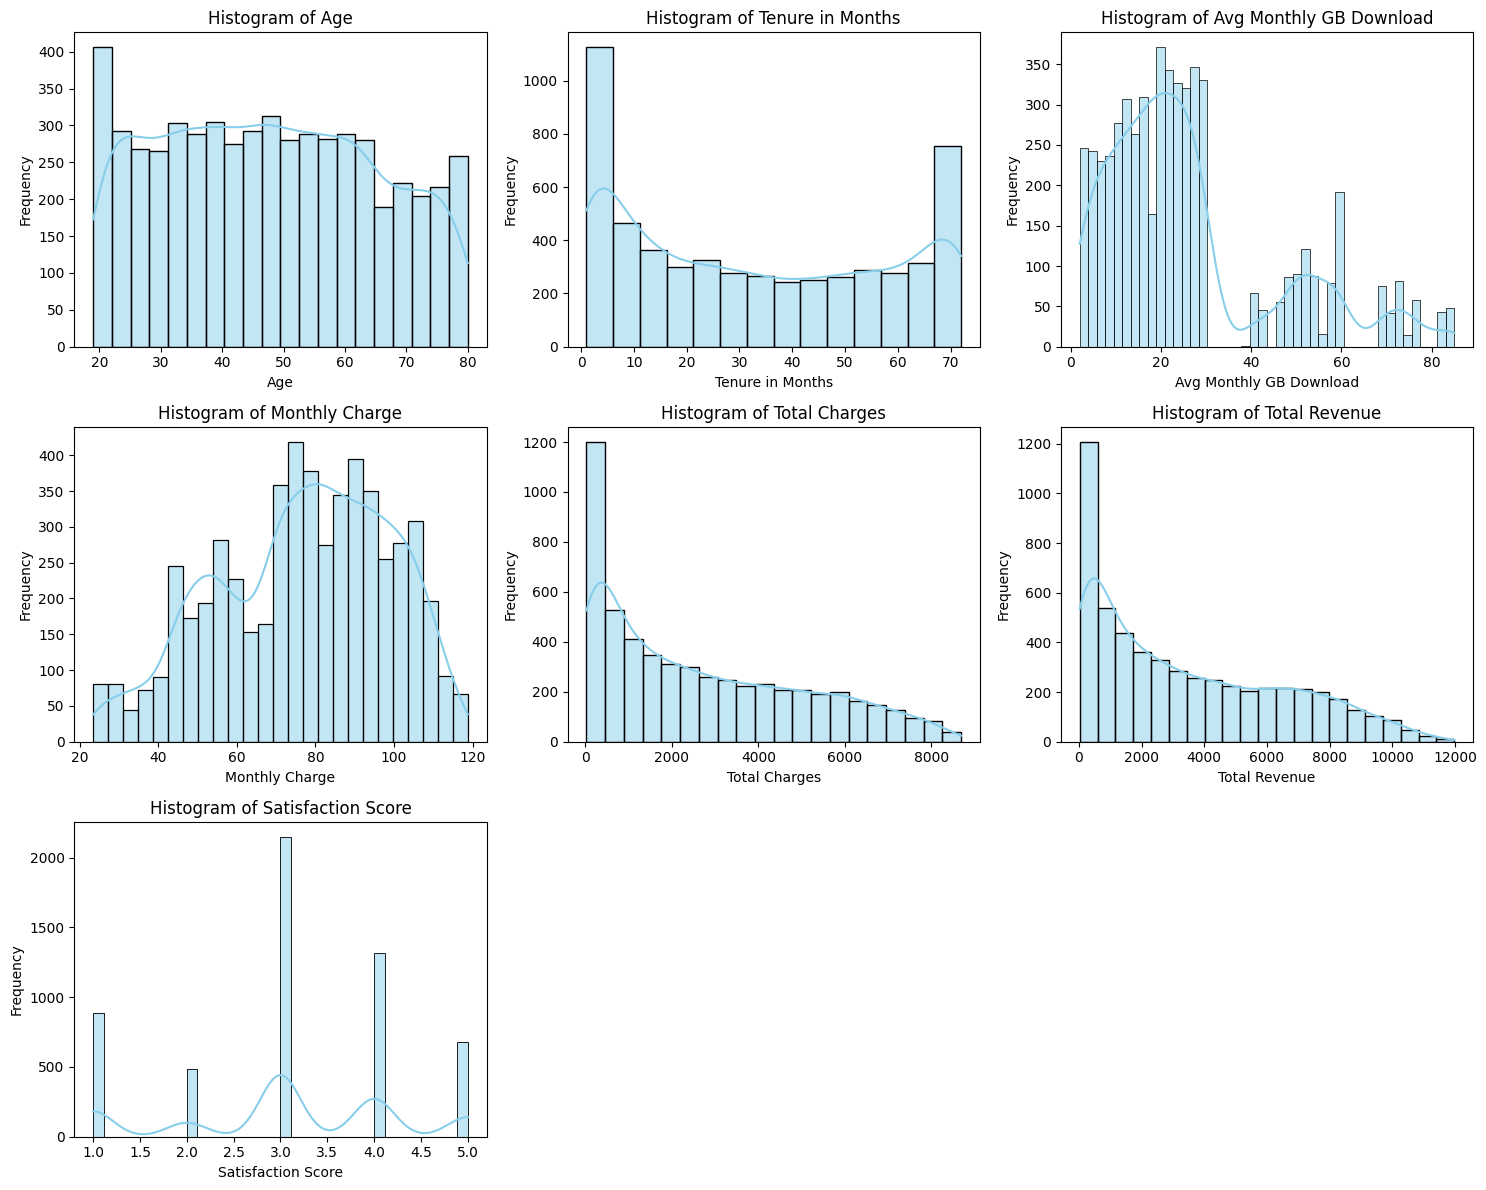

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

In [ ]:
X = df.drop(['Churn Label'], axis=1)
y = df['Churn Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4413, 24), (1104, 24), (4413,), (1104,))

Normalizing the data X_train and X_test using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CART Model without Weight

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
cart_model = DecisionTreeClassifier(max_depth=30,
    min_samples_split=20,
    min_samples_leaf=15,
    random_state=50)
cart_model.fit(X_train_scaled, y_train)
cart_pred = cart_model.predict(X_test_scaled)
cart_accuracy = accuracy_score(y_test, cart_pred)
print(f'CART Accuray: {cart_accuracy:.4f}')

CART Accuray: 0.9556


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
tn,fp,fn,tp = confusion_matrix(y_test, cart_pred).ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)
overall_error_rate = (fp + fn) / len(y_test)
accuracy = 1 - overall_error_rate
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

print(f"Proportion of False Positives: {false_positive_rate:.4f}")
print(f"Proportion of False Negatives: {false_negative_rate:.4f}")
print(f"Overall Error Rate: {overall_error_rate:.4f}")
print(f"Overall Model Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"precision: {precision:.4f}")

Proportion of False Positives: 0.0123
Proportion of False Negatives: 0.1070
Overall Error Rate: 0.0444
Overall Model Accuracy: 0.9556
Sensitivity: 0.8930
Specificity: 0.9877
precision: 0.9738


In [ ]:
if false_negative_rate > false_positive_rate:
  print("customer is wrongly predicted not to churn and they actually do")
else:
  print("customer is wrongly predicted to churn and they do not")

customer is wrongly predicted not to churn and they actually do


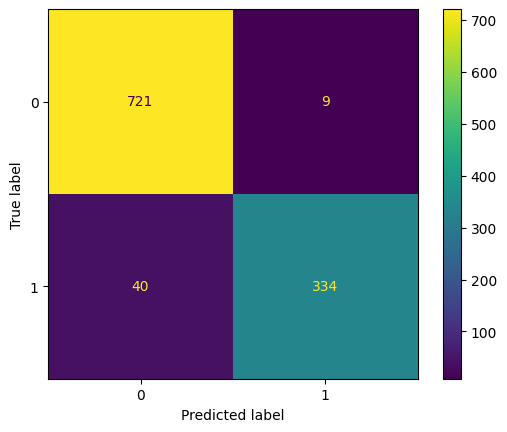

In [ ]:
conf_matrix = confusion_matrix(y_test, cart_pred)
conf_mat = confusion_matrix(y_test, cart_pred)
dis = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
dis.plot()

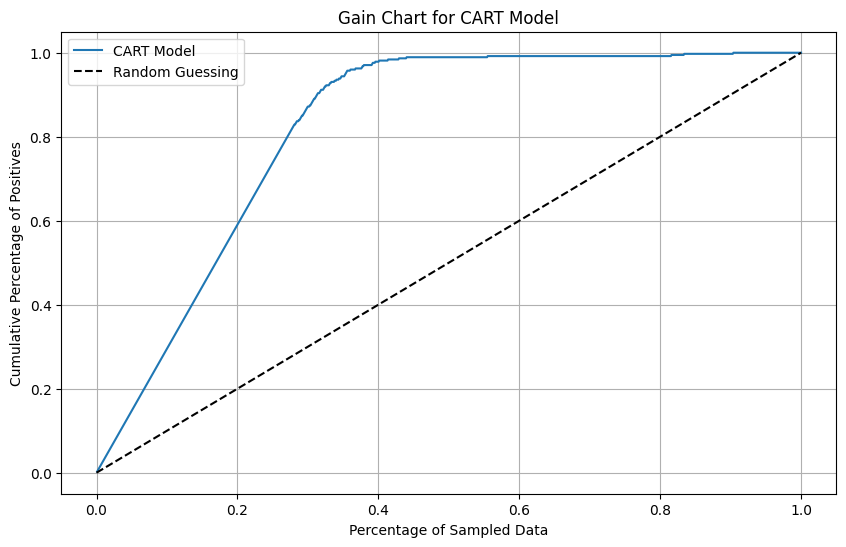

In [ ]:
cart_probs = cart_model.predict_proba(X_test_scaled)[:, 1]

df_lift = pd.DataFrame({'y_true': y_test, 'y_prob': cart_probs})

df_lift = df_lift.sort_values(by='y_prob', ascending=False)

df_lift['cumulative_positives'] = df_lift['y_true'].cumsum()

total_positives = df_lift['y_true'].sum()
df_lift['cumulative_positives_pct'] = df_lift['cumulative_positives'] / total_positives
df_lift['cumulative_data_pct'] = np.arange(1, len(df_lift) + 1) / len(df_lift)

plt.figure(figsize=(10, 6))
plt.plot(df_lift['cumulative_data_pct'], df_lift['cumulative_positives_pct'], label='CART Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('Gain Chart for CART Model')
plt.xlabel('Percentage of Sampled Data')
plt.ylabel('Cumulative Percentage of Positives')
plt.legend()
plt.grid(True)
plt.show()

AdaBoost Accuracy testing

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
log_reg.fit(X_train_scaled, y_train)
adaboost.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred_1 = adaboost.predict(X_test_scaled)
y_pred_2 = log_reg.predict(X_test_scaled)
accuracy_1 = accuracy_score(y_test, y_pred_2)
accuracy_2 = accuracy_score(y_test, y_pred_1)
print("Accuracy of logistic Regression:", accuracy_1)
print("Accuracy of AdaBoost:", accuracy_2)

Accuracy of logistic Regression: 0.9583333333333334
Accuracy of AdaBoost: 0.9628623188405797


# CART Model usig class_weight

In [ ]:
from sklearn.utils import class_weight
class_weight = {0: 1, 1: 5}
cart_model = DecisionTreeClassifier(class_weight=class_weight, max_depth=30,
    min_samples_split=20,
    min_samples_leaf=15,
    random_state=50)
cart_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=30,
                       min_samples_leaf=15, min_samples_split=20,
                       random_state=50)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

y_pred = cart_model.predict(X_test_scaled)

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()

fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
overall_error_rate = 1 - accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)

print(f"False Positive Rate: {fpr:.4f}")
print(f"False Negative Rate: {fnr:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Overall Error Rate: {overall_error_rate:.4f}")
print(f"precision: {precision:.4f}")


cart_accuracy = accuracy_score(y_test, y_pred)
print(f'CART Accuray: {cart_accuracy:.4f}')

False Positive Rate: 0.0699
False Negative Rate: 0.0160
Sensitivity (Recall): 0.9840
Specificity: 0.9301
Overall Error Rate: 0.0516
precision: 0.8783
CART Accuray: 0.9484


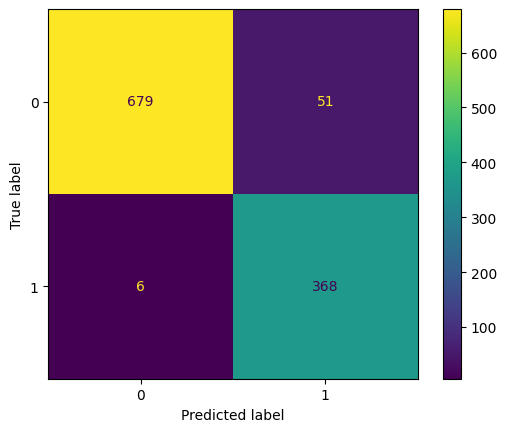

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
dis = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
dis.plot()

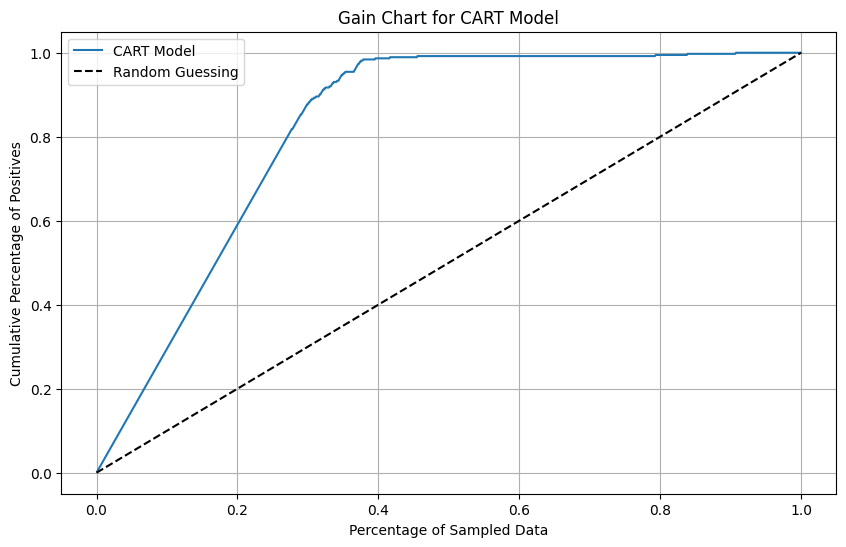

In [ ]:
cart_probs = cart_model.predict_proba(X_test_scaled)[:, 1]

df_lift = pd.DataFrame({'y_true': y_test, 'y_prob': cart_probs})

df_lift = df_lift.sort_values(by='y_prob', ascending=False)

df_lift['cumulative_positives'] = df_lift['y_true'].cumsum()

total_positives = df_lift['y_true'].sum()
df_lift['cumulative_positives_pct'] = df_lift['cumulative_positives'] / total_positives
df_lift['cumulative_data_pct'] = np.arange(1, len(df_lift) + 1) / len(df_lift)

plt.figure(figsize=(10, 6))
plt.plot(df_lift['cumulative_data_pct'], df_lift['cumulative_positives_pct'], label='CART Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('Gain Chart for CART Model')
plt.xlabel('Percentage of Sampled Data')
plt.ylabel('Cumulative Percentage of Positives')
plt.legend()
plt.grid(True)
plt.show()

# C4.5 Model wthout weight

In [ ]:
c4_5_model = DecisionTreeClassifier(criterion='entropy')
c4_5_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
c4_5_predict = c4_5_model.predict(X_train_scaled)
c4_5_accuracy = accuracy_score(y_train, c4_5_predict)
print(f'Accuracy of C4.5 model: {c4_5_accuracy:.4f}')

Accuracy of C4.5 model: 1.0000


In [ ]:
c4_5_predict = c4_5_model.predict(X_test_scaled)
c4_5_accuracy = accuracy_score(y_test, c4_5_predict)
print(f'Accuracy of C4.5 model: {c4_5_accuracy:.4f}')


Accuracy of C4.5 model: 0.9484


In [ ]:
cm = confusion_matrix(y_test, c4_5_predict)

TN, FP, FN, TP = cm.ravel()
prop_false_positives = FP / (FP + TN)
prop_false_negatives = FN / (FN + TP)
overall_error_rate = (FP + FN) / (FP + FN + TP + TN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Metrics
print(f"Proportion of False Positives: {prop_false_positives:.4f}")
print(f"Proportion of False Negatives: {prop_false_negatives:.4f}")
print(f"Overall Error Rate: {overall_error_rate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Proportion of False Positives: 0.0329
Proportion of False Negatives: 0.0882
Overall Error Rate: 0.0516
Sensitivity: 0.9118
Specificity: 0.9671


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

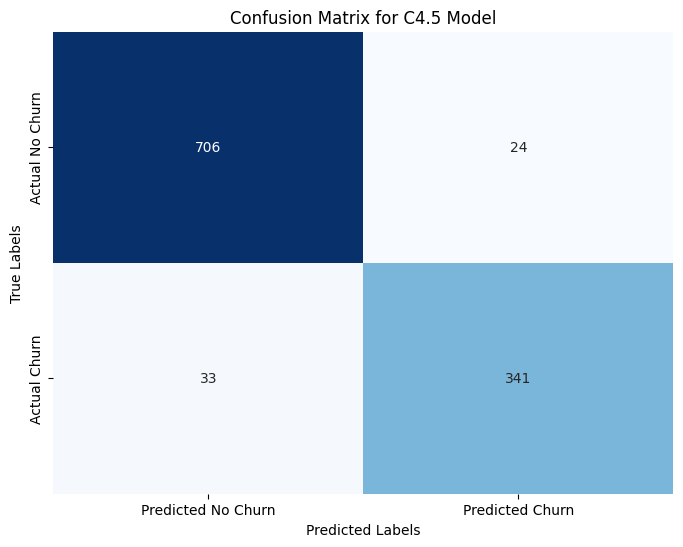

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for C4.5 Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
c4_5_probs = c4_5_model.predict_proba(X_test_scaled)[:, 1]

df_lift = pd.DataFrame({'y_true': y_test, 'y_prob': c4_5_probs})

df_lift = df_lift.sort_values(by='y_prob', ascending=False)

df_lift['cumulative_positives'] = df_lift['y_true'].cumsum()

total_positives = df_lift['y_true'].sum()
df_lift['cumulative_positives_pct'] = df_lift['cumulative_positives'] / total_positives
df_lift['cumulative_data_pct'] = np.arange(1, len(df_lift) + 1) / len(df_lift)


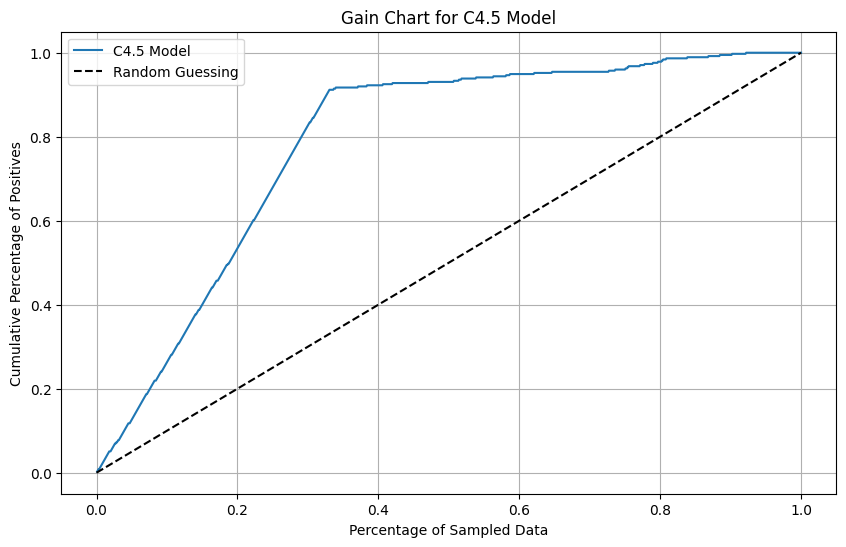

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_lift['cumulative_data_pct'], df_lift['cumulative_positives_pct'], label='C4.5 Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('Gain Chart for C4.5 Model')
plt.xlabel('Percentage of Sampled Data')
plt.ylabel('Cumulative Percentage of Positives')
plt.legend()
plt.grid(True)
plt.show()

# C4.5 Model With Weight

---



In [ ]:
c4_5_model_adj = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=30,
    min_samples_split=20,
    min_samples_leaf=15,
    class_weight={0: 2, 1: 1},
    random_state=50
)
c4_5_model_adj.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=30, min_samples_leaf=15, min_samples_split=20,
                       random_state=50)

In [ ]:
c4_5_predict_adj = c4_5_model_adj.predict(X_test_scaled)
c4_5_accuracy_adj = accuracy_score(y_test, c4_5_predict_adj)
print(f'Accuracy of C4.5 model: {c4_5_accuracy_adj:.4f}')

Accuracy of C4.5 model: 0.9502


In [ ]:
cm_adj = confusion_matrix(y_test, c4_5_predict_adj)

TN, FP, FN, TP = cm_adj.ravel()
prop_false_positives = FP / (FP + TN)
prop_false_negatives = FN / (FN + TP)
overall_error_rate = (FP + FN) / (FP + FN + TP + TN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Metrics
print(f"Proportion of False Positives: {prop_false_positives:.4f}")
print(f"Proportion of False Negatives: {prop_false_negatives:.4f}")
print(f"Overall Error Rate: {overall_error_rate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Proportion of False Positives: 0.0068
Proportion of False Negatives: 0.1337
Overall Error Rate: 0.0498
Sensitivity: 0.8663
Specificity: 0.9932


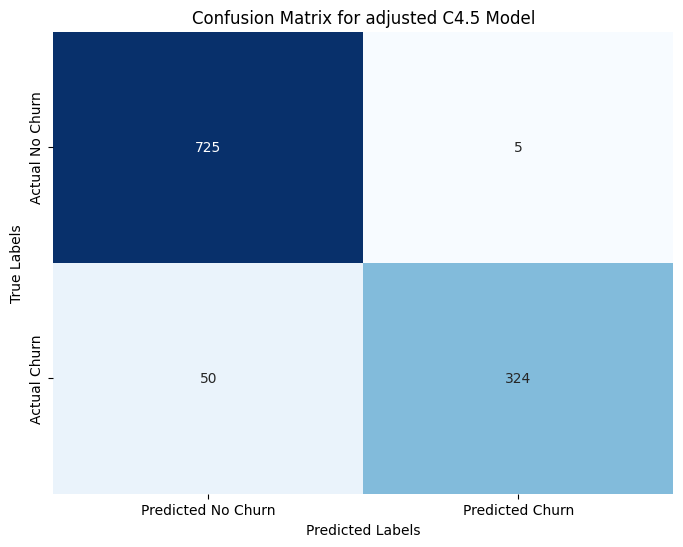

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adj, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for adjusted C4.5 Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
c4_5_probs = c4_5_model_adj.predict_proba(X_test_scaled)[:, 1]

df_lift = pd.DataFrame({'y_true': y_test, 'y_prob': c4_5_probs})

df_lift = df_lift.sort_values(by='y_prob', ascending=False)

df_lift['cumulative_positives'] = df_lift['y_true'].cumsum()

total_positives = df_lift['y_true'].sum()
df_lift['cumulative_positives_pct'] = df_lift['cumulative_positives'] / total_positives
df_lift['cumulative_data_pct'] = np.arange(1, len(df_lift) + 1) / len(df_lift)


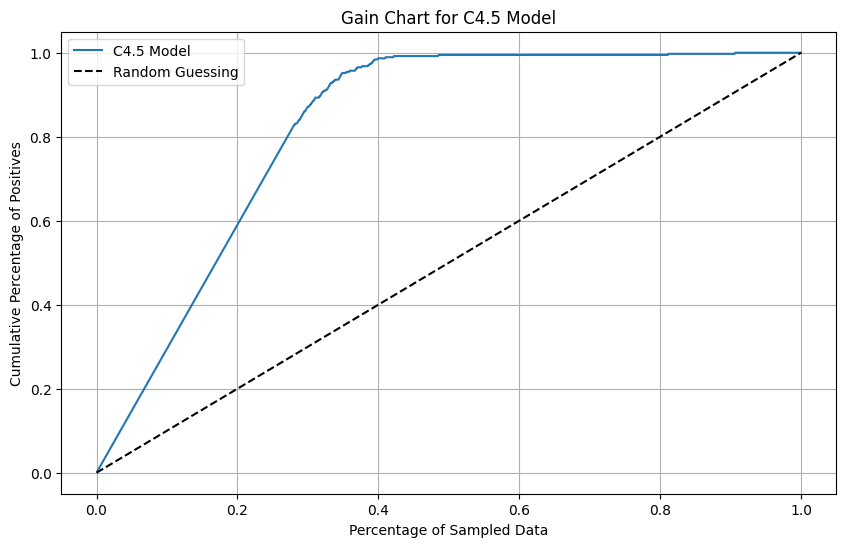

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_lift['cumulative_data_pct'], df_lift['cumulative_positives_pct'], label='C4.5 Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title('Gain Chart for C4.5 Model')
plt.xlabel('Percentage of Sampled Data')
plt.ylabel('Cumulative Percentage of Positives')
plt.legend()
plt.grid(True)
plt.show()

# Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 84)                  │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 84)                  │           7,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 105)                 │           8,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 63)                  │           6,678 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 42)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 105)                 │           4,515 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             106 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,152 (125.59 KB)

 Trainable params: 32,152 (125.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6062 - loss: 0.6320 - val_accuracy: 0.8641 - val_loss: 0.3862
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8991 - loss: 0.3002 - val_accuracy: 0.9402 - val_loss: 0.1408
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9378 - loss: 0.1473 - val_accuracy: 0.9484 - val_loss: 0.1151
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9508 - loss: 0.1114 - val_accuracy: 0.9502 - val_loss: 0.1147
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9507 - loss: 0.1121 - val_accuracy: 0.9466 - val_loss: 0.1041
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9578 - loss: 0.0994 - val_accuracy: 0.9502 - val_loss: 0.1090
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9533 - loss: 0.1052 - val_accuracy: 0.9565 - val_loss: 0.0991
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9584 - loss: 0.1022 - val_accuracy: 0.9520 - v

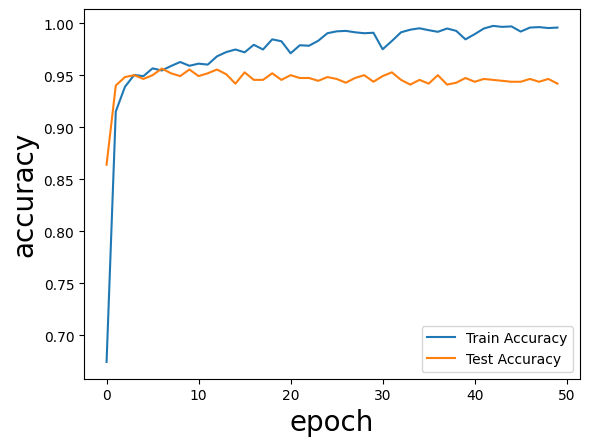

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(84, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(105, activation='relu'))
model.add(Dense(63, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(105, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',loss='binary_crossentropy', metrics = ['accuracy'] )
model.summary()

history = model.fit(X_train_scaled, y_train,epochs=50, batch_size=200, validation_data=(X_test_scaled,y_test))

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.legend()

In [ ]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").reshape(-1)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'loss: {loss}, Accuracy:{accuracy}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9531 - loss: 0.1292 
loss: 0.14075890183448792, Accuracy:0.948369562625885


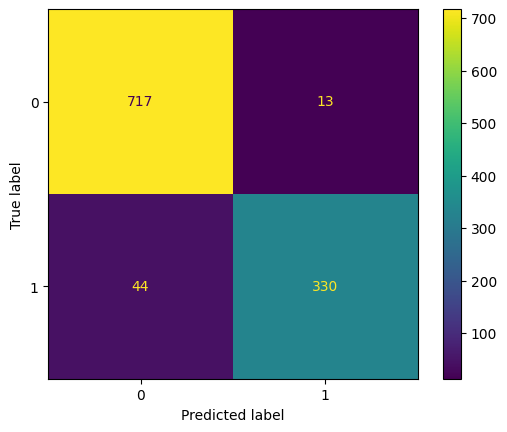

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
dis = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
dis.plot()

In [ ]:
from sklearn.metrics import classification_report
class_names = ['Yes','No']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         Yes       0.94      0.98      0.96       730
          No       0.96      0.88      0.92       374

    accuracy                           0.95      1104
   macro avg       0.95      0.93      0.94      1104
weighted avg       0.95      0.95      0.95      1104

